# Tarea 1: Fundamentos
## Tópicos selectos de Ciencia de datos
### Luis David Huante García

**Problema 1: Amira, Bernardo, Constancio, Dora y Eric fueron a una fiesta.Algunos de ellos estrecharon la mano entre si. Si Amira solo estrecho la mano una vez, Bernardo lo hizo 2 veces, Constancio lo hizo 3 veces y Dora lo hizo 4 veces, ¿cuantas veces lo hizo Eric?**

R. Para determinar cuántas veces Eric estrechó la mano, podemos sumar todas las veces que se estrecharon manos en total:

1 (Amira) + 2 (Bernardo) + 3 (Constancio) + 4 (Dora) = 10 estrechones de manos en total.

Dado que cada estrechón de manos involucra a dos personas (una para cada persona que estrecha la mano), podemos dividir el total de estrechones de manos por 2 para obtener el número de personas involucradas en los estrechones de manos:

10 estrechones de manos / 2 = 5 personas involucradas.

Deeducimos que Eric estrechó la mano 5 - 1 = 4 veces en la fiesta.

**Problema 2: Cinco amigos Pedro, Queta, Rosario, Salvador y Teresa se dan la mano. Tanto Pedro como Queta estrecharon la mano de uno de sus amigos solamente, mientras que Rosario, Salvador y Teresa estrecharon cada uno la mano de dos. Sabemos que Pedro estrechó la mano de Teresa. ¿Quiénes podemos asegurar que no se dieron la mano?**

Sabemos que:

1. Pedro, Queta, Rosario, Salvador y Teresa se dan la mano.
2. Pedro y Queta estrecharon la mano de solamente uno de sus amigos.
3. Rosario, Salvador y Teresa estrecharon cada uno la mano de dos.
4. Pedro estrechó la mano de Teresa.

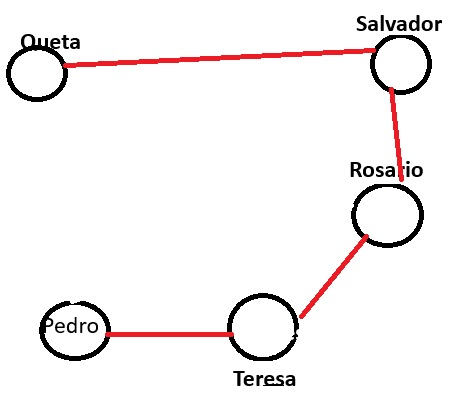

Con este grafo, se observa más detalladamente la relación de los apretones de manos entre cada persona. Se cumplen las condiciones previamente establecidas. De esta manera, podemos asegurar que:
1. Pedro, Teresa y Rosario no le dieron la mano a Queta.
2. Queta, Salvador y Rosario no le dieron la mano a Pedro.

**Problema 3: En un grupo de 5 personas, hay dos personas que reportan tener amistad con exactamente una persona del grupo, dos que reportan tener amistad con exactamente dos personas del grupo y una que reporta tener amistad con exactamente tres. Si la amistad es recíproca, ¿es esto posible?**

Podemos pensar en un acomodo particular de las personas y su amistad, exceptuando C, a quien por ahora conectaremos con solo dos personas:   
   
  1. Persona A es amiga de Persona B.
  2. Persona E es amiga de Persona D.
  3. Persona B es amiga de Persona A y Persona C.
  4. Persona D es amiga de Persona C y Persona E.
  5. Persona C es amiga de Persona B y Persona D.


En este acomodo, hay dos personas (A y E) que tienen amistad con exactamente una persona del grupo, dos personas (B y D) que tienen amistad con exactamente dos personas del grupo y una persona (C) que supuestamente tiene amistad con exactamente tres personas del grupo. Sin embargo, en el momento en el que conectamos a C con una persona más, se rompe cualquiera de las otras cuatro condiciones.

Por lo tanto, es imposible cumplir con las condiciones dadas.

## NetworkX

Para practicar nuestros conocimientos de la biblioteca Networkx vamos a suponer que la CSAM está organizando una noche de cine como parte de la jornada de inducción, y a un grupo de Tics le toca elegir la película que se va a proyectar.

Después de varias rondas de debate, cada persona del grupo tiene tres películas finalistas. Puedes ver la relación persona-película en el archivo Morres CicloCine2023.txt. Además, en las tutorías se supo cómo andaba la relación entre las personas del grupo.

Con una encuesta super avanzada que tomaba en cuenta trabajos en equipo, ambiente en el salón y carta astral, se determinó el score que aparece en el archivo Morres Relacion2023.txt. Un número negativo significa enemistad, un número positivo significa amistad y un cero significa que las personas no han interactuado o son indiferentes.

Tu misión es analizar la situación tomando en cuenta toda la información del grupo y tus conocimientos de NetworkX.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Crea un grafo bipartita G que permita vincular estudiantes y películas. ¿Qué tipo de grafo tiene sentido en este caso: Graph, DiGraph, MultiGraph o Multi-DiGraph?

In [ ]:
#Crea el nodo y genera las relaciones
G = nx.Graph()
with open('cine.txt', 'r') as f:
    for line in f.readlines():
        L = line.split()
        G.add_edge(L[0], ''.join(L[1:]))

In [ ]:
#Creamos dos listas para diferenciar a los nodos
students = []
movies = []
with open('cine.txt', 'r') as f:
    for line in f.readlines():
        L = line.split()
        students.append(L[0])
        movies.append(''.join(L[1:]))

In [ ]:
Movies = list(dict.fromkeys(movies))
Students = list(dict.fromkeys(students))
print(Movies, Students)

['Anaconda', 'MeanGirls', 'TheMatrix', 'MontyPythonAndTheHolyGrail', 'SnakesOnAPlane', 'TheShawshankRedemption', 'TheSocialNetwork', 'ForrestGump', 'KungFuPanda', 'TheDarkKnight', 'TheGodfather'] ['Jadiel', 'Arely', 'Ibeth', 'LuisDavid', 'Deb', 'Aaron', 'Mariela', 'Miriam', 'Alexis', 'Kalid', 'Karime']


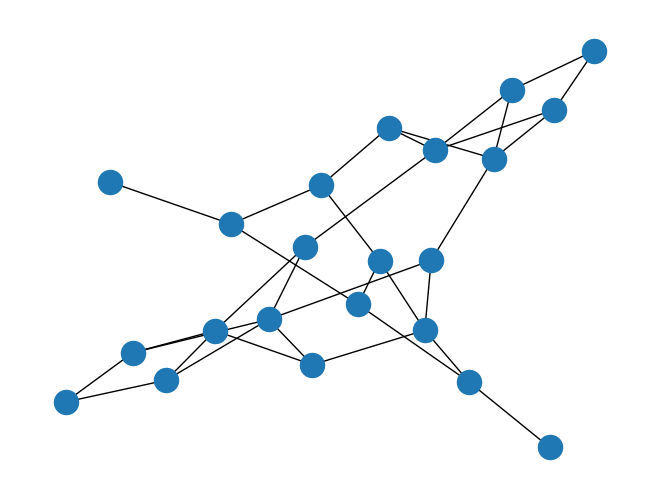

In [ ]:
nx.draw(G)

2. En el grafo G que ya creaste, agrega un atributo “tipo” para los nodos, que permita identificar cuáles corresponden a películas y cuáles a personas.

In [ ]:
for s in students:
    G.nodes[s]['type'] = 'student'
for m in movies:
    G.nodes[m]['type'] = 'movie'

In [ ]:
G.nodes(data=True)

NodeDataView({'Jadiel': {'type': 'student'}, 'Anaconda': {'type': 'movie'}, 'MeanGirls': {'type': 'movie'}, 'TheMatrix': {'type': 'movie'}, 'Arely': {'type': 'student'}, 'MontyPythonAndTheHolyGrail': {'type': 'movie'}, 'SnakesOnAPlane': {'type': 'movie'}, 'Ibeth': {'type': 'student'}, 'TheShawshankRedemption': {'type': 'movie'}, 'TheSocialNetwork': {'type': 'movie'}, 'LuisDavid': {'type': 'student'}, 'Deb': {'type': 'student'}, 'ForrestGump': {'type': 'movie'}, 'KungFuPanda': {'type': 'movie'}, 'Aaron': {'type': 'student'}, 'Mariela': {'type': 'student'}, 'TheDarkKnight': {'type': 'movie'}, 'Miriam': {'type': 'student'}, 'TheGodfather': {'type': 'movie'}, 'Alexis': {'type': 'student'}, 'Kalid': {'type': 'student'}, 'Karime': {'type': 'student'}})

3. Construye una figura del grafo G. Tu visualización debe permitir identificar claramente a cada persona y distinguir entre películas y personas.

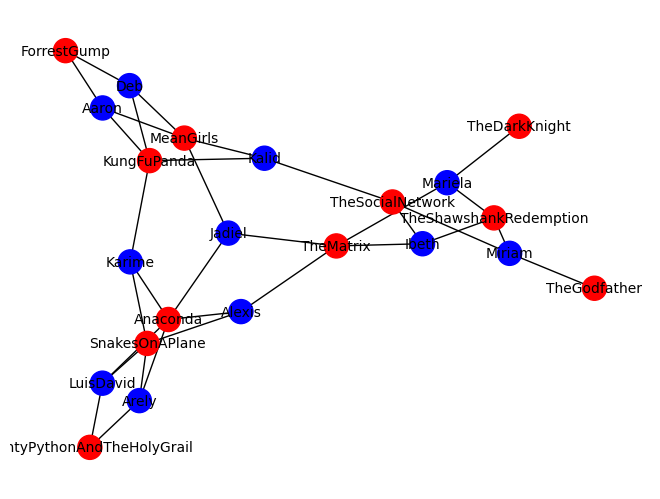

In [ ]:
color_map = ['red' if G.nodes[node]['type'] == 'movie' else 'blue' for node in G]
nx.draw_spring(G, with_labels=True,node_size = 300, font_size=10, node_color = color_map)

4. Encuentra G_(estudiantes), una proyección pesada del grafo bipartita anterior, de modo que en esta nueva representación los nodos correspondan a estudiantes y aristas pesadas indiquen cuántas películas tienen en común. Utiliza la matriz de adyacencia de G.

In [ ]:
A = nx.adjacency_matrix(G)
A
A_Matrix = A.todense()
A_Matrix, A_Matrix.shape

(array([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 

In [ ]:
nx.degree(G)

DegreeView({'Jadiel': 3, 'Anaconda': 5, 'MeanGirls': 4, 'TheMatrix': 4, 'Arely': 3, 'MontyPythonAndTheHolyGrail': 2, 'SnakesOnAPlane': 4, 'Ibeth': 3, 'TheShawshankRedemption': 3, 'TheSocialNetwork': 3, 'LuisDavid': 3, 'Deb': 3, 'ForrestGump': 2, 'KungFuPanda': 4, 'Aaron': 3, 'Mariela': 3, 'TheDarkKnight': 1, 'Miriam': 3, 'TheGodfather': 1, 'Alexis': 3, 'Kalid': 3, 'Karime': 3})

In [ ]:
person_nodes, movie_nodes = nx.bipartite.sets(G)

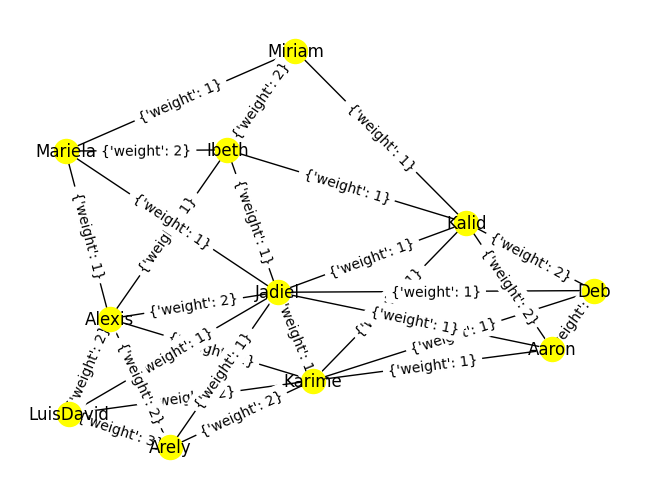

In [ ]:
G4 = nx.bipartite.weighted_projected_graph(G,person_nodes)
pos = nx.spring_layout(G4, seed=1)
nx.draw(G4, pos = pos, with_labels=True, node_color= 'yellow')
G_Weighted = nx.draw_networkx_edge_labels(G4, pos, font_size=10)

5. Construye una figura del grafo Gestudiantes, de forma tal que se pueda apreciar visualmente el peso de las aristas. Además, aprovecha este ejercicio para hacer una figura que te guste: prueba colores1, formas de nodos, tamaños, fondo de la figura. La próxima semana vamos a hacer una galería con los diferentes dibujos de redes.

In [ ]:
weights_g4 = G4.edges(data=True); weights_g4

EdgeDataView([('Karime', 'LuisDavid', {'weight': 2}), ('Karime', 'Aaron', {'weight': 1}), ('Karime', 'Deb', {'weight': 1}), ('Karime', 'Jadiel', {'weight': 1}), ('Karime', 'Arely', {'weight': 2}), ('Karime', 'Alexis', {'weight': 2}), ('Karime', 'Kalid', {'weight': 1}), ('LuisDavid', 'Jadiel', {'weight': 1}), ('LuisDavid', 'Alexis', {'weight': 2}), ('LuisDavid', 'Arely', {'weight': 3}), ('Aaron', 'Jadiel', {'weight': 1}), ('Aaron', 'Deb', {'weight': 3}), ('Aaron', 'Kalid', {'weight': 2}), ('Ibeth', 'Miriam', {'weight': 2}), ('Ibeth', 'Jadiel', {'weight': 1}), ('Ibeth', 'Mariela', {'weight': 2}), ('Ibeth', 'Alexis', {'weight': 1}), ('Ibeth', 'Kalid', {'weight': 1}), ('Deb', 'Jadiel', {'weight': 1}), ('Deb', 'Kalid', {'weight': 2}), ('Miriam', 'Mariela', {'weight': 1}), ('Miriam', 'Kalid', {'weight': 1}), ('Jadiel', 'Arely', {'weight': 1}), ('Jadiel', 'Mariela', {'weight': 1}), ('Jadiel', 'Alexis', {'weight': 2}), ('Jadiel', 'Kalid', {'weight': 1}), ('Mariela', 'Alexis', {'weight': 1}), (

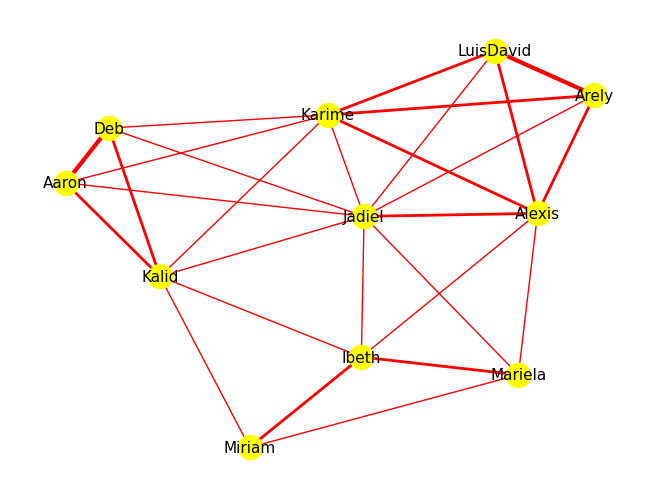

In [ ]:
edges = G4.edges()
pos = nx.kamada_kawai_layout(G)
weights = [G4[u][v]['weight'] for u,v in edges]
nx.draw(G4, pos, edge_color='red', width=weights, with_labels=True, font_size=11, node_color='yellow')

6. ¿Reflejará la relación entre estudiantes sus gustos en cine? Calcula el coeficiente de correlación de Pearson entre el score de la relación entre estudiantes y las películas que tienen en común. Si dos personas no tienen películas en común, deberías usar un cero (no un valor faltante).

In [ ]:
df_relationships = pd.read_csv("relacion.txt", delim_whitespace=True)
df_relationships

In [ ]:
df_w = nx.to_pandas_edgelist(G4)
df_w

In [ ]:
df_n = df_relationships.join(df_w, on=None, how='left')

In [ ]:
correlation = df_n['weight'].corr(df_relationships['weight']); correlation

-0.38400273849786565

El valor de correlación de Pearson de -0.384 sugiere que hay una correlación moderada y negativa entre el "score" de relación entre estudiantes y las películas que tienen en común, lo que podría indicar una diversidad de gustos en el grupo de estudiantes o la influencia de otras variables en las preferencias de películas.